In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2021-12-29 10:02:10.113612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-29 10:02:10.113641: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [4]:
# Normalizing training data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
cnn=models.Sequential([

#cnn
layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),

layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
#dense_layer
layers.Flatten(),
layers.Dense(64,activation="relu"),
layers.Dense(10,activation="softmax")
]
)

2021-12-29 10:02:24.950619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-29 10:02:24.950669: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-29 10:02:24.950706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IG154): /proc/driver/nvidia/version does not exist
2021-12-29 10:02:24.951344: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
cnn.fit(x_train, y_train, epochs=2,verbose=True)

2021-12-29 10:02:25.897921: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-12-29 10:02:26.414353: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1367 - accuracy: 0.9592
Epoch 2/2
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0458 - accuracy: 0.9856


In [9]:
pred = cnn.predict(x_test)

2021-12-29 10:03:28.242367: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


In [10]:
pred

array([[1.63693571e-07, 1.47551429e-08, 6.92561935e-06, ...,
        9.99978304e-01, 5.85834755e-07, 9.51960374e-06],
       [8.97872212e-07, 8.91849850e-05, 9.99861479e-01, ...,
        2.29664199e-08, 2.78646212e-07, 2.31025504e-10],
       [1.37947234e-06, 9.99329925e-01, 1.06428488e-05, ...,
        1.00203630e-04, 1.10558773e-04, 1.12542502e-05],
       ...,
       [8.27397248e-11, 6.55887078e-08, 3.40473032e-11, ...,
        3.45252147e-07, 1.78111918e-06, 3.81138705e-07],
       [1.35134613e-07, 1.35772082e-09, 1.71905490e-10, ...,
        5.88328719e-10, 1.02777107e-04, 7.48866427e-08],
       [2.88395685e-09, 1.97374614e-08, 1.18597235e-07, ...,
        2.04036215e-11, 1.36127838e-07, 1.16721255e-09]], dtype=float32)

In [11]:
pred = [np.argmax(i) for i in pred]

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [13]:
accuracy_score(y_test,pred)

0.9866

<AxesSubplot:>

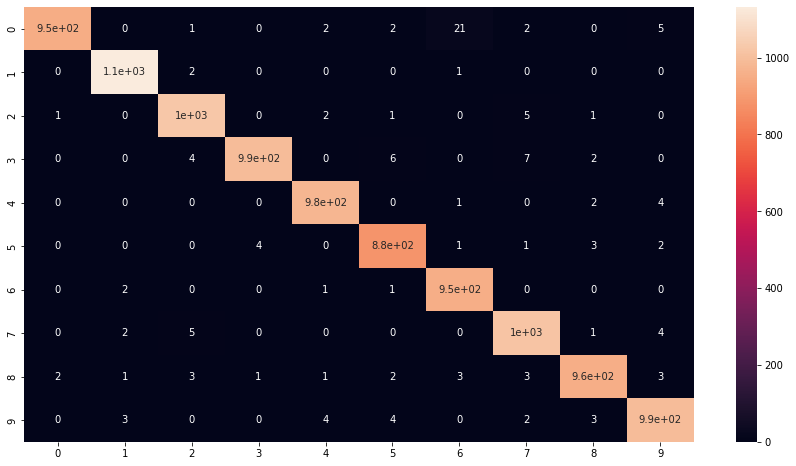

In [14]:
import seaborn as sns
c = confusion_matrix(y_test,pred)
plt.figure(figsize=(15,8))
sns.heatmap(c, annot=True)

7


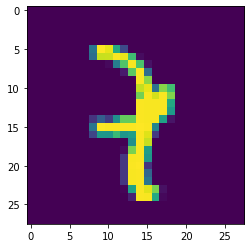

In [15]:
plt.imshow(x_test[551])
print(pred[551])

4


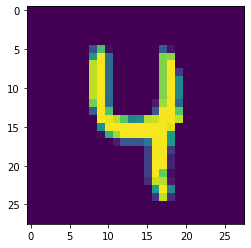

In [16]:
plt.imshow(x_test[1542])
print(pred[1542])

9


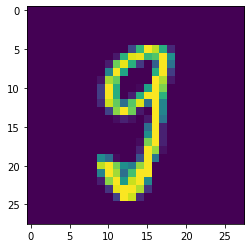

In [17]:
plt.imshow(x_test[1952])
print(pred[1952])

In [51]:
def create_model():
    cnn=models.Sequential([

    #cnn
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense_layer
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
    ]
    )
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

    

In [58]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [68]:
#model = KerasClassifier(build_fn=create_model, verbose=1)

In [69]:
epochs = {'epochs':[5,10,15]}
batch_size = {'batch_size':[4,8,16]}
optimizer = {'optimizer':['Adam','SGD']}


In [70]:
param_grid = {'epochs':[5,10,15],'batch_size':[4,8,16]}

In [71]:
grid = GridSearchCV(estimator=create_model, param_grid=param_grid, cv=3)


In [72]:
grid.fit(x_train,y_train)

TypeError: estimator should be an estimator implementing 'fit' method, <function create_model at 0x7f9f74970040> was passed